In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline

In [2]:
df=pd.read_csv("C:\\train.csv")
df.head()

,rn,activity,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
0,7,STANDING,0.279,-0.0196,-0.1100,-0.997,-0.967,-0.983,-0.997,-0.966,...,0.146,-0.217,-0.5640,-0.2130,-0.2310,0.0146,-0.190,-0.852,0.182,-0.0430
1,11,STANDING,0.277,-0.0127,-0.1030,-0.995,-0.973,-0.985,-0.996,-0.974,...,0.121,0.349,0.0577,0.0807,0.5960,-0.4760,0.116,-0.852,0.188,-0.0347
2,14,STANDING,0.277,-0.0147,-0.1070,-0.999,-0.991,-0.993,-0.999,-0.991,...,0.740,-0.564,-0.7660,0.1060,-0.0903,-0.1320,0.499,-0.850,0.189,-0.0351
3,15,STANDING,0.298,0.0271,-0.0617,-0.989,-0.817,-0.902,-0.989,-0.794,...,0.131,0.208,-0.0681,0.0623,-0.0587,0.0312,-0.269,-0.731,0.283,0.0364
4,20,STANDING,0.276,-0.0170,-0.1110,-0.998,-0.991,-0.998,-0.998,-0.989,...,0.667,-0.942,-0.9660,0.2450,0.1030,0.0661,-0.412,-0.761,0.263,0.0296


In [3]:
test=pd.read_csv("C:\\test.csv")
test.head()

,rn,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,tBodyAcc.mad.Z,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
0,3,0.280,-0.0195,-0.113,-0.995,-0.967,-0.979,-0.997,-0.964,-0.977,...,0.4150,-0.391,-0.760,-0.11900,0.1780,0.101,0.809,-0.849,0.181,-0.0491
1,5,0.277,-0.0166,-0.115,-0.998,-0.981,-0.990,-0.998,-0.980,-0.990,...,0.0878,-0.351,-0.699,0.12300,0.1230,0.694,-0.616,-0.848,0.185,-0.0439
2,9,0.277,-0.0218,-0.121,-0.997,-0.961,-0.984,-0.998,-0.957,-0.984,...,0.3140,-0.269,-0.573,0.01300,0.0809,-0.234,0.118,-0.848,0.189,-0.0374
3,17,0.279,-0.0148,-0.117,-0.997,-0.982,-0.983,-0.997,-0.982,-0.981,...,0.5610,-0.779,-0.940,-0.00145,-0.0481,-0.340,-0.229,-0.759,0.264,0.0270
4,26,0.279,-0.0145,-0.107,-0.998,-0.986,-0.993,-0.998,-0.985,-0.995,...,0.6770,-0.715,-0.937,0.02570,0.0665,-0.226,-0.225,-0.762,0.262,0.0294


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3609 entries, 0 to 3608
Columns: 563 entries, rn to angle.Z.gravityMean
dtypes: float64(561), int64(1), object(1)
memory usage: 15.5+ MB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1541 entries, 0 to 1540
Columns: 562 entries, rn to angle.Z.gravityMean
dtypes: float64(561), int64(1)
memory usage: 6.6 MB


In [6]:
df.describe()

,rn,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,tBodyAcc.mad.Z,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
count,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,...,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000
mean,5152.430590,0.274544,-0.017415,-0.109195,-0.608457,-0.506265,-0.614482,-0.634634,-0.521660,-0.616047,...,0.128804,-0.300815,-0.619400,0.007561,0.009484,0.029185,-0.010632,-0.496977,0.060040,-0.050202
std,2975.767839,0.063589,0.042589,0.056218,0.439157,0.501627,0.399514,0.413194,0.485282,0.394932,...,0.240278,0.317963,0.308303,0.332249,0.448971,0.613615,0.490830,0.509336,0.311308,0.263935
min,7.000000,-0.521000,-1.000000,-0.926000,-1.000000,-0.999000,-1.000000,-1.000000,-0.999000,-1.000000,...,-0.786000,-0.968000,-0.995000,-0.969000,-0.997000,-1.000000,-0.993000,-0.999000,-1.000000,-0.971000
25%,2570.000000,0.262000,-0.025200,-0.122000,-0.992000,-0.976000,-0.979000,-0.993000,-0.976000,-0.978000,...,-0.015800,-0.533000,-0.836000,-0.118000,-0.281000,-0.478000,-0.398000,-0.816000,-0.015600,-0.122000
50%,5158.000000,0.277000,-0.017200,-0.109000,-0.939000,-0.812000,-0.844000,-0.946000,-0.816000,-0.837000,...,0.132000,-0.341000,-0.706000,0.007740,0.009830,0.029600,-0.013400,-0.716000,0.183000,-0.005260
75%,7727.000000,0.287000,-0.011000,-0.098000,-0.254000,-0.051700,-0.283000,-0.306000,-0.084500,-0.288000,...,0.290000,-0.118000,-0.501000,0.142000,0.309000,0.554000,0.374000,-0.522000,0.252000,0.104000
max,10281.000000,0.693000,1.000000,1.000000,1.000000,0.980000,1.000000,1.000000,0.988000,1.000000,...,0.871000,0.990000,0.957000,0.981000,0.997000,0.999000,0.996000,0.977000,1.000000,0.998000


In [7]:
test.describe()

,rn,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,tBodyAcc.mad.Z,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
count,1541.000000,1541.00000,1541.000000,1541.000000,1541.000000,1541.000000,1541.000000,1541.000000,1541.000000,1541.000000,...,1541.000000,1541.000000,1541.000000,1541.000000,1541.000000,1541.000000,1541.000000,1541.000000,1541.000000,1541.000000
mean,5161.052563,0.27582,-0.018046,-0.109217,-0.607266,-0.516822,-0.617703,-0.632406,-0.532077,-0.619526,...,0.132199,-0.316954,-0.634735,0.008390,0.014311,-0.000550,0.006301,-0.493145,0.061068,-0.054510
std,3018.400705,0.06066,0.024662,0.046271,0.440922,0.499209,0.400243,0.416450,0.483753,0.396243,...,0.246591,0.313443,0.297231,0.338114,0.450936,0.621036,0.482773,0.511159,0.303507,0.270579
min,3.000000,-0.41000,-0.268000,-0.347000,-0.999000,-1.000000,-0.999000,-0.999000,-1.000000,-1.000000,...,-0.786000,-1.000000,-0.993000,-1.000000,-1.000000,-0.999000,-0.991000,-0.997000,-0.987000,-0.971000
25%,2504.000000,0.26300,-0.024800,-0.121000,-0.992000,-0.978000,-0.980000,-0.993000,-0.979000,-0.979000,...,-0.014900,-0.551000,-0.848000,-0.129000,-0.279000,-0.526000,-0.370000,-0.814000,-0.018400,-0.136000
50%,5064.000000,0.27700,-0.017200,-0.109000,-0.945000,-0.865000,-0.862000,-0.951000,-0.869000,-0.857000,...,0.141000,-0.353000,-0.718000,0.011900,0.027500,-0.004190,0.001220,-0.723000,0.183000,-0.002240
75%,7888.000000,0.28900,-0.010400,-0.098300,-0.239000,-0.062700,-0.273000,-0.290000,-0.082100,-0.287000,...,0.293000,-0.140000,-0.523000,0.148000,0.301000,0.527000,0.377000,-0.512000,0.249000,0.103000
max,10294.000000,0.56400,0.153000,0.719000,0.718000,1.000000,0.753000,0.722000,1.000000,0.728000,...,0.947000,0.941000,0.927000,1.000000,1.000000,0.993000,0.991000,0.912000,0.901000,0.991000


In [8]:
df.shape


(3609, 563)

In [9]:
test.shape

(1541, 562)

In [10]:
df.drop_duplicates()

,rn,activity,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
0,7,STANDING,0.279,-0.01960,-0.1100,-0.9970,-0.9670,-0.983,-0.997,-0.9660,...,0.1460,-0.2170,-0.5640,-0.2130,-0.2310,0.0146,-0.1900,-0.852,0.182,-0.0430
1,11,STANDING,0.277,-0.01270,-0.1030,-0.9950,-0.9730,-0.985,-0.996,-0.9740,...,0.1210,0.3490,0.0577,0.0807,0.5960,-0.4760,0.1160,-0.852,0.188,-0.0347
2,14,STANDING,0.277,-0.01470,-0.1070,-0.9990,-0.9910,-0.993,-0.999,-0.9910,...,0.7400,-0.5640,-0.7660,0.1060,-0.0903,-0.1320,0.4990,-0.850,0.189,-0.0351
3,15,STANDING,0.298,0.02710,-0.0617,-0.9890,-0.8170,-0.902,-0.989,-0.7940,...,0.1310,0.2080,-0.0681,0.0623,-0.0587,0.0312,-0.2690,-0.731,0.283,0.0364
4,20,STANDING,0.276,-0.01700,-0.1110,-0.9980,-0.9910,-0.998,-0.998,-0.9890,...,0.6670,-0.9420,-0.9660,0.2450,0.1030,0.0661,-0.4120,-0.761,0.263,0.0296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3604,10277,WALKING_UPSTAIRS,0.357,-0.04460,-0.1300,-0.3140,-0.0556,-0.173,-0.386,-0.0575,...,0.0168,-0.1630,-0.5930,-0.7110,-0.0612,-0.7060,0.0646,-0.660,0.274,0.1760
3605,10278,WALKING_UPSTAIRS,0.344,0.00479,-0.1220,-0.3200,-0.0667,-0.182,-0.380,-0.0710,...,-0.0292,0.1810,-0.2500,-0.4030,-0.7060,0.7390,0.8710,-0.653,0.278,0.1800
3606,10279,WALKING_UPSTAIRS,0.284,-0.00796,-0.1190,-0.3090,-0.0804,-0.211,-0.369,-0.0971,...,-0.1100,0.0245,-0.3930,-0.0761,-0.2390,0.9600,0.0866,-0.657,0.272,0.1830
3607,10280,WALKING_UPSTAIRS,0.207,0.02460,-0.1040,-0.3650,-0.1690,-0.216,-0.449,-0.1860,...,-0.2140,-0.3520,-0.7340,0.5350,-0.2570,0.9270,-0.0843,-0.657,0.267,0.1880


In [11]:
df=df.drop('rn',axis=1)
df.shape

(3609, 562)

In [12]:
cdf=pd.DataFrame(index=df.columns)
cdf['DATATYPE']=df.dtypes
cdf['UNIQUE']=df.nunique()
cdf['NULL']=df.isnull().sum()
cdf

,DATATYPE,UNIQUE,NULL
activity,object,6,0
tBodyAcc.mean.X,float64,375,0
tBodyAcc.mean.Y,float64,1243,0
tBodyAcc.mean.Z,float64,689,0
tBodyAcc.std.X,float64,1014,0
...,...,...,...
angle.tBodyGyroMean.gravityMean,float64,1843,0
angle.tBodyGyroJerkMean.gravityMean,float64,1847,0
angle.X.gravityMean,float64,940,0
angle.Y.gravityMean,float64,1172,0


In [13]:
df['activity'].unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

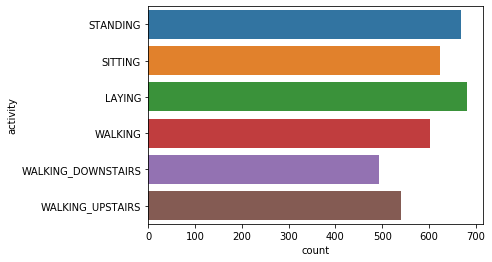

In [14]:
sns.countplot(y='activity',data=df)

In [15]:
col=df.columns
X=df[col[1:]].values
X[0:5]


array([[ 0.279 , -0.0196, -0.11  , ..., -0.852 ,  0.182 , -0.043 ],
       [ 0.277 , -0.0127, -0.103 , ..., -0.852 ,  0.188 , -0.0347],
       [ 0.277 , -0.0147, -0.107 , ..., -0.85  ,  0.189 , -0.0351],
       [ 0.298 ,  0.0271, -0.0617, ..., -0.731 ,  0.283 ,  0.0364],
       [ 0.276 , -0.017 , -0.111 , ..., -0.761 ,  0.263 ,  0.0296]])

In [16]:
y=df['activity'].values
y[0:5]

array(['STANDING', 'STANDING', 'STANDING', 'STANDING', 'STANDING'],
      dtype=object)

In [17]:
from sklearn.preprocessing import StandardScaler
X=StandardScaler().fit_transform(X)
X[0:5]

array([[ 0.07008998, -0.05130281, -0.01432096, ..., -0.69712768,
         0.39182231,  0.02729073],
       [ 0.03863356,  0.1107345 ,  0.1102126 , ..., -0.69712768,
         0.41109853,  0.05874224],
       [ 0.03863356,  0.06376716,  0.03905057, ..., -0.69320045,
         0.41431123,  0.0572265 ],
       [ 0.36892595,  1.04538448,  0.84496062, ..., -0.45953059,
         0.71630523,  0.32816414],
       [ 0.02290535,  0.00975473, -0.03211147, ..., -0.51843896,
         0.65205119,  0.30239664]])

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=3)


In [19]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
rf

C:\Users\ASHINONU\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [20]:
yhat=rf.predict(x_test)
yhat

array(['STANDING', 'STANDING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS',
       'LAYING', 'WALKING_DOWNSTAIRS', 'STANDING', 'SITTING', 'STANDING',
       'LAYING', 'WALKING_DOWNSTAIRS', 'SITTING', 'WALKING_DOWNSTAIRS',
       'LAYING', 'SITTING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS',
       'SITTING', 'LAYING', 'LAYING', 'LAYING', 'STANDING', 'LAYING',
       'WALKING', 'STANDING', 'LAYING', 'SITTING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS', 'SITTING', 'SITTING', 'STANDING', 'SITTING',
       'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS', 'WALKING_UPSTAIRS',
       'WALKING', 'WALKING', 'LAYING', 'WALKING_UPSTAIRS', 'SITTING',
       'SITTING', 'WALKING_DOWNSTAIRS', 'WALKING', 'STANDING',
       'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'WALKING', 'STANDING',
       'WALKING', 'LAYING', 'SITTING', 'LAYING', 'LAYING',
       'WALKING_UPSTAIRS', 'SITTING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS', 'LAYING', 'WALKING_DOWNSTAIRS', 'SITTING',
       'WALKING_UPSTAIRS', 'WALKI

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test,yhat))

                    precision    recall  f1-score   support

            LAYING       1.00      0.99      1.00       144
           SITTING       0.92      0.98      0.95       132
          STANDING       0.97      0.91      0.94       122
           WALKING       0.96      0.99      0.97       117
WALKING_DOWNSTAIRS       0.96      0.95      0.95       100
  WALKING_UPSTAIRS       0.96      0.94      0.95       107

          accuracy                           0.96       722
         macro avg       0.96      0.96      0.96       722
      weighted avg       0.96      0.96      0.96       722



In [22]:
test[0:5]

,rn,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,tBodyAcc.mad.Z,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
0,3,0.280,-0.0195,-0.113,-0.995,-0.967,-0.979,-0.997,-0.964,-0.977,...,0.4150,-0.391,-0.760,-0.11900,0.1780,0.101,0.809,-0.849,0.181,-0.0491
1,5,0.277,-0.0166,-0.115,-0.998,-0.981,-0.990,-0.998,-0.980,-0.990,...,0.0878,-0.351,-0.699,0.12300,0.1230,0.694,-0.616,-0.848,0.185,-0.0439
2,9,0.277,-0.0218,-0.121,-0.997,-0.961,-0.984,-0.998,-0.957,-0.984,...,0.3140,-0.269,-0.573,0.01300,0.0809,-0.234,0.118,-0.848,0.189,-0.0374
3,17,0.279,-0.0148,-0.117,-0.997,-0.982,-0.983,-0.997,-0.982,-0.981,...,0.5610,-0.779,-0.940,-0.00145,-0.0481,-0.340,-0.229,-0.759,0.264,0.0270
4,26,0.279,-0.0145,-0.107,-0.998,-0.986,-0.993,-0.998,-0.985,-0.995,...,0.6770,-0.715,-0.937,0.02570,0.0665,-0.226,-0.225,-0.762,0.262,0.0294


In [23]:
test=test.drop('rn',axis=1)
test.shape

(1541, 561)

In [34]:
tdf=pd.DataFrame(index=test.columns)
tdf['DATATYPE']=test.dtypes
tdf['UNIQUE']=test.nunique()
tdf['NULL']=test.isnull().sum()
tdf

,DATATYPE,UNIQUE,NULL
tBodyAcc.mean.X,float64,288,0
tBodyAcc.mean.Y,float64,729,0
tBodyAcc.mean.Z,float64,417,0
tBodyAcc.std.X,float64,593,0
tBodyAcc.std.Y,float64,724,0
...,...,...,...
angle.tBodyGyroMean.gravityMean,float64,1091,0
angle.tBodyGyroJerkMean.gravityMean,float64,1097,0
angle.X.gravityMean,float64,683,0
angle.Y.gravityMean,float64,725,0


In [35]:
tcol=test.columns
X=test[tcol[0:]].values
X[0:5]



array([[ 0.28  , -0.0195, -0.113 , ..., -0.849 ,  0.181 , -0.0491],
       [ 0.277 , -0.0166, -0.115 , ..., -0.848 ,  0.185 , -0.0439],
       [ 0.277 , -0.0218, -0.121 , ..., -0.848 ,  0.189 , -0.0374],
       [ 0.279 , -0.0148, -0.117 , ..., -0.759 ,  0.264 ,  0.027 ],
       [ 0.279 , -0.0145, -0.107 , ..., -0.762 ,  0.262 ,  0.0294]])

In [36]:
X=StandardScaler().fit_transform(X)
X[0:5]

array([[ 0.06893185, -0.05896875, -0.08179351, ..., -0.69639981,
         0.39528222,  0.02000022],
       [ 0.01946015,  0.05866066, -0.12503122, ..., -0.69444284,
         0.40846575,  0.03922449],
       [ 0.01946015, -0.15226103, -0.25474434, ..., -0.69444284,
         0.42164929,  0.06325482],
       [ 0.05244129,  0.13167202, -0.16826892, ..., -0.52027208,
         0.66884055,  0.30133993],
       [ 0.05244129,  0.14384058,  0.04791961, ..., -0.52614301,
         0.66224878,  0.31021266]])

In [38]:
pred=rf.predict(X)

In [39]:
test['activity']=pred

In [40]:
test[0:5]

,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,tBodyAcc.mad.Z,tBodyAcc.max.X,...,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean,activity
0,0.280,-0.0195,-0.113,-0.995,-0.967,-0.979,-0.997,-0.964,-0.977,-0.939,...,-0.391,-0.760,-0.11900,0.1780,0.101,0.809,-0.849,0.181,-0.0491,STANDING
1,0.277,-0.0166,-0.115,-0.998,-0.981,-0.990,-0.998,-0.980,-0.990,-0.942,...,-0.351,-0.699,0.12300,0.1230,0.694,-0.616,-0.848,0.185,-0.0439,STANDING
2,0.277,-0.0218,-0.121,-0.997,-0.961,-0.984,-0.998,-0.957,-0.984,-0.941,...,-0.269,-0.573,0.01300,0.0809,-0.234,0.118,-0.848,0.189,-0.0374,STANDING
3,0.279,-0.0148,-0.117,-0.997,-0.982,-0.983,-0.997,-0.982,-0.981,-0.942,...,-0.779,-0.940,-0.00145,-0.0481,-0.340,-0.229,-0.759,0.264,0.0270,STANDING
4,0.279,-0.0145,-0.107,-0.998,-0.986,-0.993,-0.998,-0.985,-0.995,-0.943,...,-0.715,-0.937,0.02570,0.0665,-0.226,-0.225,-0.762,0.262,0.0294,STANDING
